## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [115]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [116]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [117]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [118]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [119]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [120]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna(how="any", inplace=True) 

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [121]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","")

/var/folders/s4/ynf7hry93nq4zdz9gxb8byk00000gn/T/ipykernel_85355/4199732401.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp['Close'] = bitstamp['Close'].str.replace("$","")


In [122]:
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [123]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)

In [124]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [125]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [126]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.dropna(how="any", inplace=True) 
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [127]:
coinbase['Close'] = coinbase['Close'].str.replace("$","")
coinbase.head()

/var/folders/s4/ynf7hry93nq4zdz9gxb8byk00000gn/T/ipykernel_85355/457718760.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase['Close'] = coinbase['Close'].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [128]:
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


In [129]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [130]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]].copy()
bitstamp_sliced.columns =['bitstamp close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,bitstamp close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [131]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,["Close"]].copy()
coinbase_sliced.columns = ['coinbase close']
# Review the first five rows of the DataFrame
coinbase_sliced.head()

,coinbase close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [132]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [133]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


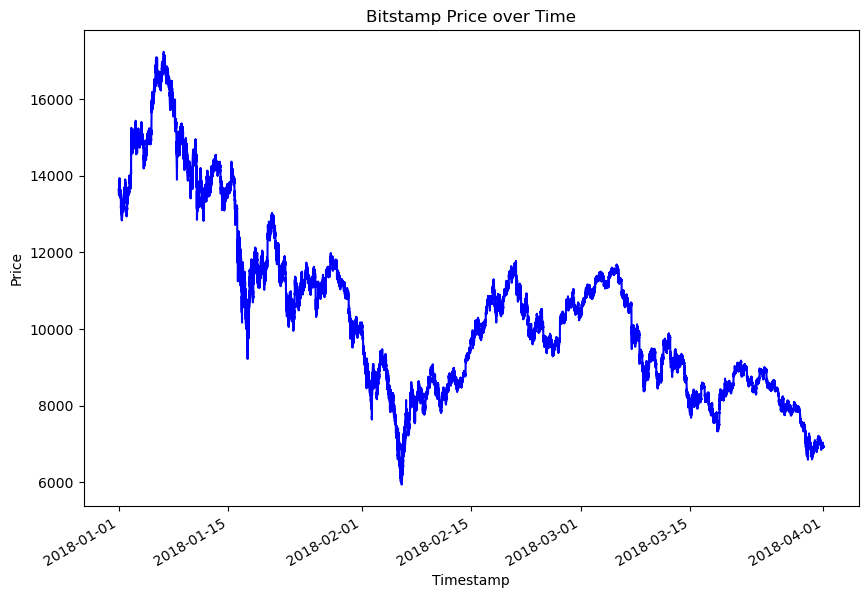

In [134]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
ax = bitstamp_sliced.plot(kind="line", figsize=(10,7), title="Bitstamp Price over Time", color="blue", legend=False)
ax.set_ylabel("Price");

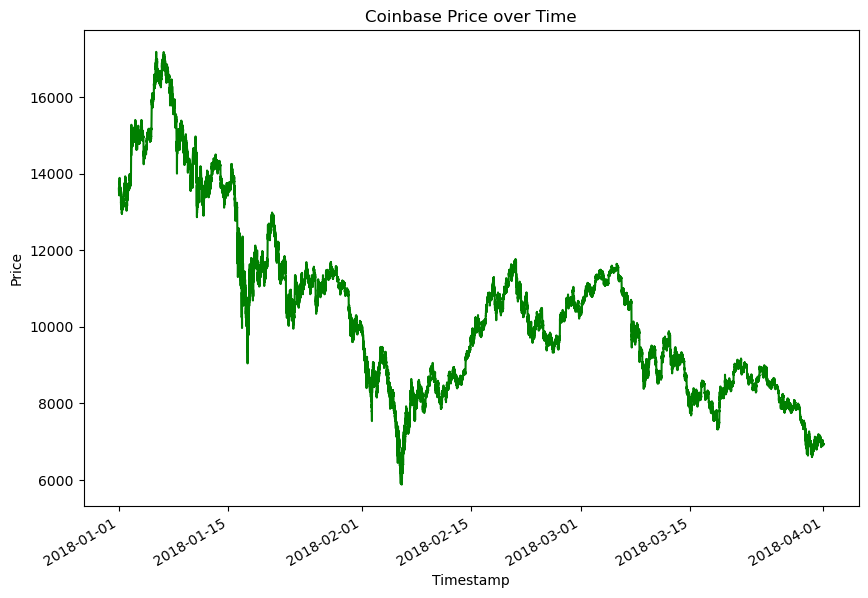

In [135]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
ax = coinbase_sliced.plot(kind="line", figsize=(10,7), title="Coinbase Price over Time", color="green", legend=False)
ax.set_ylabel("Price");

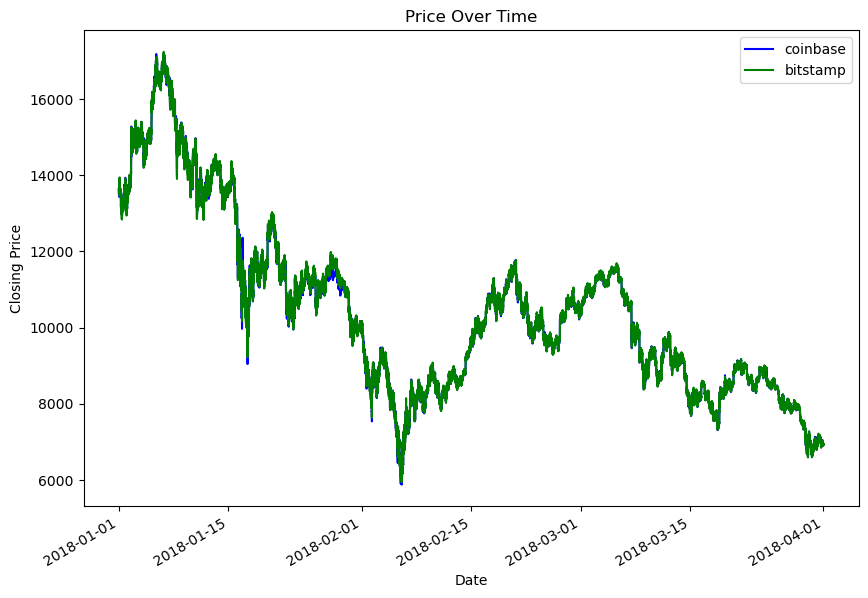

In [136]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
ax = coinbase_sliced.plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title("Price Over Time");

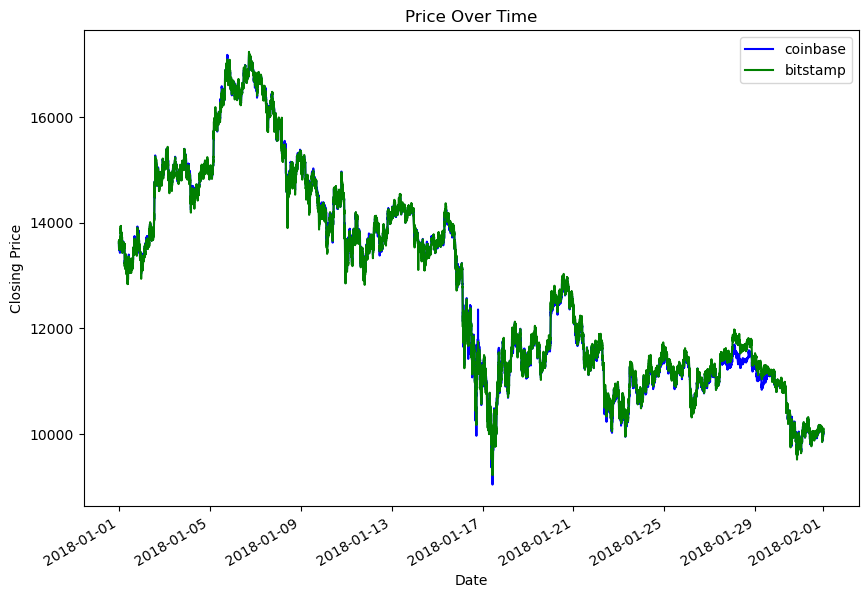

In [137]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
ax = coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title("Price Over Time");

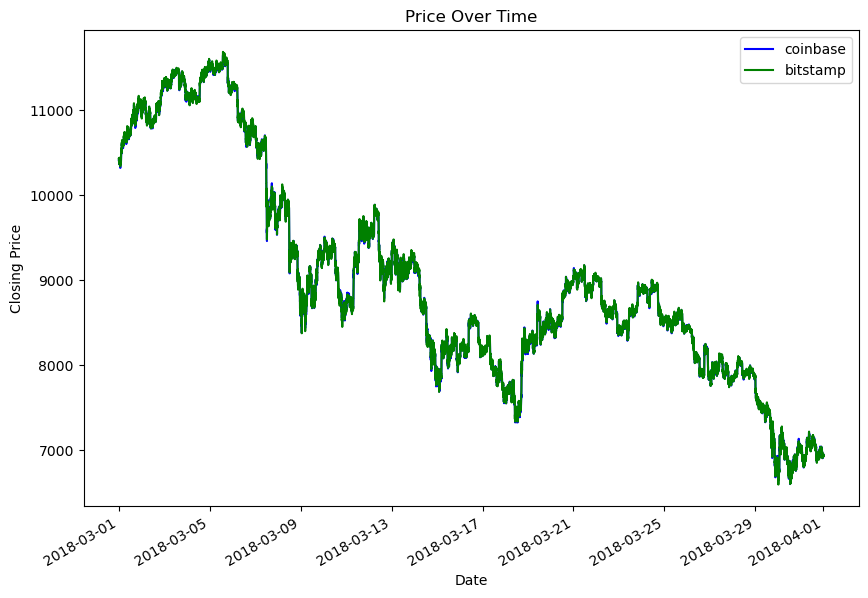

In [138]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
ax = coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title("Price Over Time");

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** There appears to be less spread for the second (later) time period.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [139]:
date_early = '2018-01-04'
date_middle = '2018-02-18'
date_late = '2018-03-25'

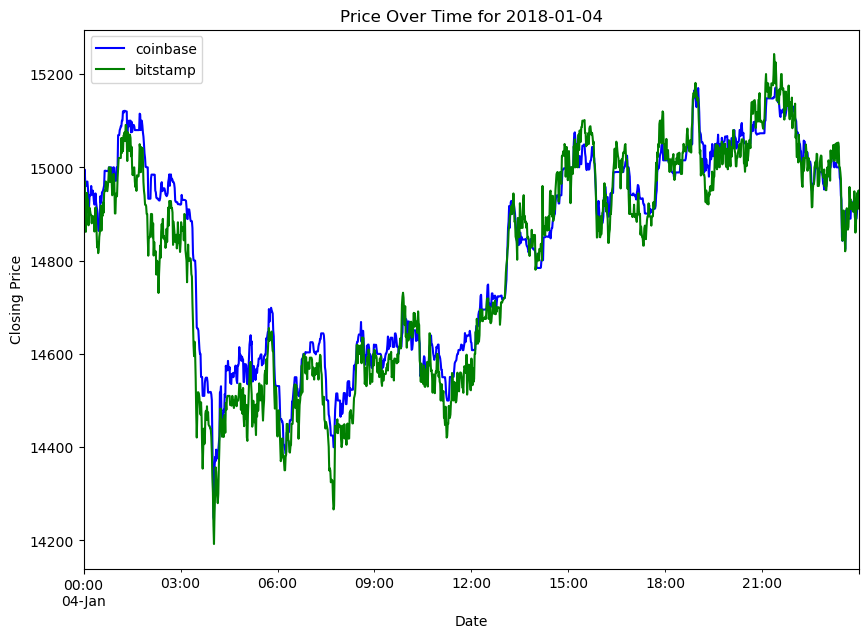

In [140]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax = coinbase_sliced.loc[date_early].plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.loc[date_early].plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title(f"Price Over Time for {date_early}");

In [141]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc[date_early]['coinbase close'] - bitstamp_sliced.loc[date_early]['bitstamp close']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1440.00000
mean       28.73225
std        50.00892
min      -159.12000
25%        -6.50500
50%        29.64500
75%        59.96750
max       240.00000
dtype: float64

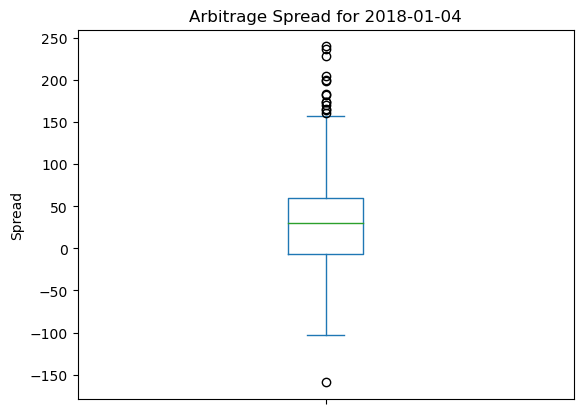

In [142]:
# Visualize the arbitrage spread from early in the dataset in a box plot

ax = arbitrage_spread_early.plot(kind='box')
ax.set_title(f"Arbitrage Spread for {date_early}")
ax.set_ylabel("Spread");

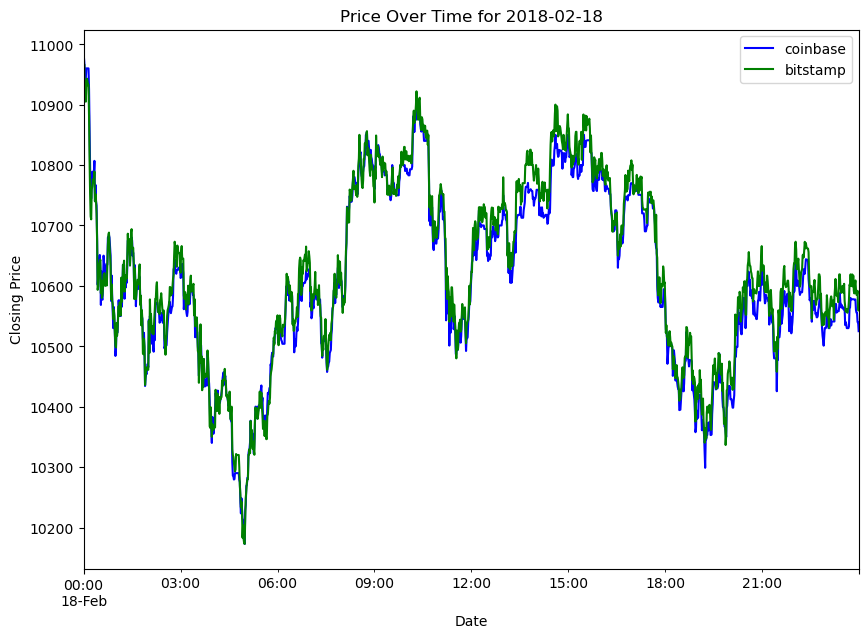

In [143]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = coinbase_sliced.loc[date_middle].plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.loc[date_middle].plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title(f"Price Over Time for {date_middle}");

In [144]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc[date_middle]['coinbase close'] - bitstamp_sliced.loc[date_middle]['bitstamp close']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean      -15.861741
std        18.735501
min       -73.230000
25%       -29.277500
50%       -15.820000
75%        -3.182500
max        55.590000
dtype: float64

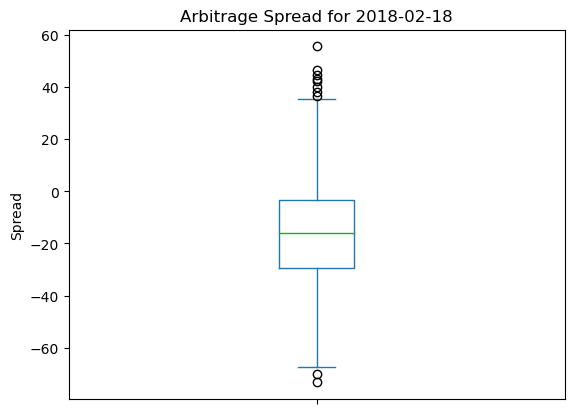

In [145]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
ax = arbitrage_spread_middle.plot(kind='box')
ax.set_title(f"Arbitrage Spread for {date_middle}")
ax.set_ylabel("Spread");

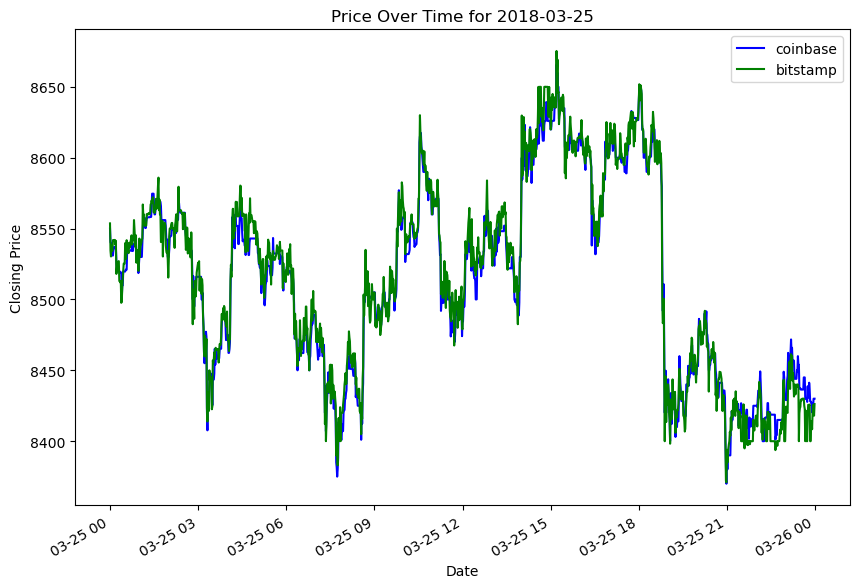

In [146]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = coinbase_sliced.loc[date_late].plot(kind="line", figsize=(10,7), color='blue', legend=True)
bitstamp_sliced.loc[date_late].plot(kind="line", figsize=(10,7), color='green', ax=ax, legend=True)
ax.legend(["coinbase", "bitstamp"])
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.set_title(f"Price Over Time for {date_late}");

In [147]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc[date_late]['coinbase close'] - bitstamp_sliced.loc[date_late]['bitstamp close']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean       -2.294423
std         9.853020
min       -34.640000
25%        -8.810000
50%        -2.805000
75%         3.767500
max        53.940000
dtype: float64

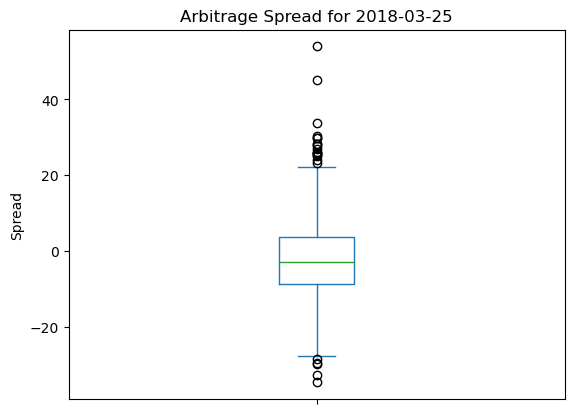

In [148]:
# Visualize the arbitrage spread from late in the dataset in a box plot
ax = arbitrage_spread_late.plot(kind='box')
ax.set_title(f"Arbitrage Spread for {date_late}")
ax.set_ylabel("Spread");

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [149]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc[date_early]['coinbase close'] - bitstamp_sliced.loc[date_early]['bitstamp close']
arbitrage_spread_middle = coinbase_sliced.loc[date_middle]['coinbase close'] - bitstamp_sliced.loc[date_middle]['bitstamp close']
arbitrage_spread_late = coinbase_sliced.loc[date_late]['coinbase close'] - bitstamp_sliced.loc[date_late]['bitstamp close']


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
print("Summary for Early Spread")
print(arbitrage_spread_early.loc[arbitrage_spread_early > 0].describe())

print("")
print("Summary for Middle Spread")
print(arbitrage_spread_middle.loc[arbitrage_spread_middle > 0].describe())

print()
print("Summary for Late Spread")
print(arbitrage_spread_late.loc[arbitrage_spread_late > 0].describe())

Summary for Early Spread
count    1024.000000
mean       52.519609
std        36.932341
min         0.010000
25%        24.825000
50%        46.505000
75%        71.810000
max       240.000000
dtype: float64

Summary for Middle Spread
count    282.000000
mean      10.939078
std        9.518918
min        0.010000
25%        4.100000
50%        8.605000
75%       15.427500
max       55.590000
dtype: float64

Summary for Late Spread
count    540.000000
mean       7.356963
std        6.785546
min        0.010000
25%        2.530000
50%        5.430000
75%        9.945000
max       53.940000
dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [150]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early=  arbitrage_spread_early[arbitrage_spread_early > 0]/bitstamp_sliced.loc[date_early]['bitstamp close']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.head(15)

Timestamp
2018-01-04 00:00:00    0.002634
2018-01-04 00:01:00    0.002816
2018-01-04 00:02:00    0.001670
2018-01-04 00:03:00    0.003870
2018-01-04 00:04:00    0.006616
2018-01-04 00:05:00    0.002195
2018-01-04 00:06:00    0.001619
2018-01-04 00:07:00    0.002460
2018-01-04 00:08:00    0.001630
2018-01-04 00:09:00    0.003647
2018-01-04 00:10:00    0.001093
2018-01-04 00:11:00    0.001801
2018-01-04 00:12:00    0.002228
2018-01-04 00:13:00    0.002751
2018-01-04 00:14:00    0.004161
dtype: float64

In [151]:
spread_return_middle=  arbitrage_spread_middle[arbitrage_spread_middle > 0]/bitstamp_sliced.loc[date_middle]['bitstamp close']
spread_return_middle.head(15)

Timestamp
2018-02-18 00:00:00    0.003327
2018-02-18 00:01:00    0.000559
2018-02-18 00:02:00    0.003503
2018-02-18 00:03:00    0.002026
2018-02-18 00:04:00    0.003675
2018-02-18 00:05:00    0.002054
2018-02-18 00:06:00    0.001554
2018-02-18 00:07:00    0.001873
2018-02-18 00:08:00    0.002561
2018-02-18 00:09:00    0.002473
2018-02-18 00:10:00    0.004087
2018-02-18 00:11:00    0.005144
2018-02-18 00:12:00    0.004006
2018-02-18 00:13:00    0.004332
2018-02-18 00:14:00    0.003206
dtype: float64

In [152]:
spread_return_late =  arbitrage_spread_late[arbitrage_spread_late > 0]/bitstamp_sliced.loc[date_late]['bitstamp close']
spread_return_late.head(15)

Timestamp
2018-03-25 00:00:00         NaN
2018-03-25 00:01:00    0.000704
2018-03-25 00:02:00    0.001134
2018-03-25 00:03:00         NaN
2018-03-25 00:04:00         NaN
2018-03-25 00:05:00         NaN
2018-03-25 00:06:00         NaN
2018-03-25 00:07:00         NaN
2018-03-25 00:08:00         NaN
2018-03-25 00:09:00         NaN
2018-03-25 00:10:00         NaN
2018-03-25 00:11:00         NaN
2018-03-25 00:12:00         NaN
2018-03-25 00:13:00    0.001053
2018-03-25 00:14:00         NaN
dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [153]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE
print("Early Trades")
display(profitable_trades_early.head())
print("\nMiddle Trades")
display(profitable_trades_middle.head())
print("\nLate Trades")
display(profitable_trades_late.head())

Early Trades


Timestamp
2018-01-04 01:59:00    0.010101
2018-01-04 02:10:00    0.011711
2018-01-04 02:12:00    0.011509
2018-01-04 02:15:00    0.011171
2018-01-04 02:19:00    0.013534
dtype: float64


Middle Trades


Series([], dtype: float64)


Late Trades


Series([], dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [154]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    21.000000
mean      0.012226
std       0.002038
min       0.010004
25%       0.010639
50%       0.011509
75%       0.013534
max       0.016580
dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [155]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc[date_early]['bitstamp close']


# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early.head()

Timestamp
2018-01-04 01:59:00    150.00
2018-01-04 02:10:00    173.45
2018-01-04 02:12:00    170.49
2018-01-04 02:15:00    165.00
2018-01-04 02:19:00    199.37
dtype: float64

<div class="alert alert-info">
  <strong>As there were no profitable trades for either the middle or late trading day, no code was made for those dataframes from step 5 forward.. Please refer to step 4 above for verification that neither of these dataframes contained any data. (count = 0 for both dataframes)</strong>
</div>


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [156]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count     21.000000
mean     178.460952
std       29.150020
min      146.740000
25%      156.000000
50%      170.490000
75%      199.370000
max      240.000000
dtype: float64

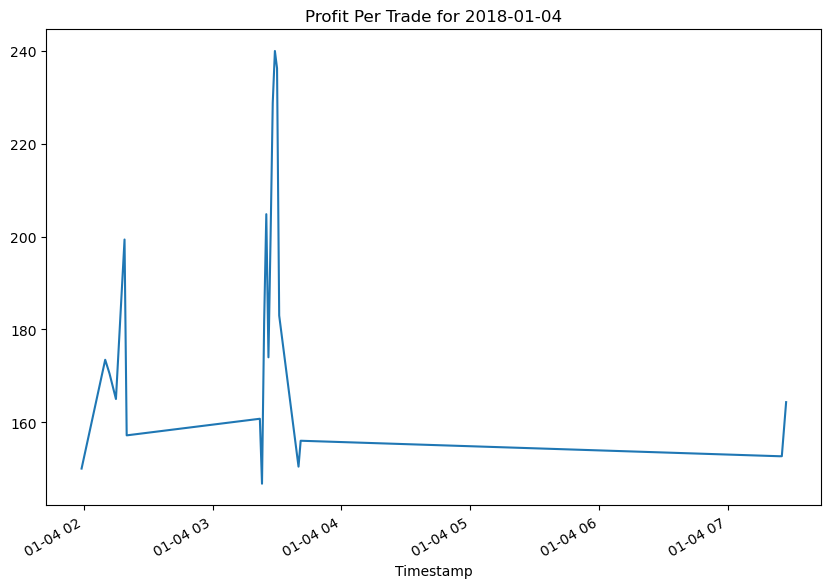

In [157]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(10,7), title=f"Profit Per Trade for {date_early}");

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [158]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.sum()

3747.680000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [159]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

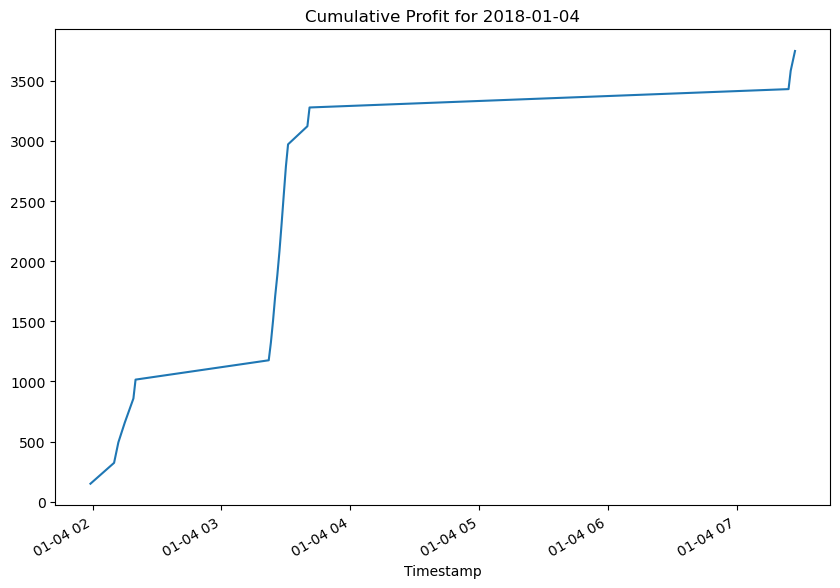

In [160]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(10,7), title=f"Cumulative Profit for {date_early}");

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 
considering there were no profits found for the later two dates it is not possible to find any trends. Looking at the early date, it appears that there had been very minimal profits available throughout the day, with the exception of three periods where there was a comparatively large jump in the potential profit.